# <font color='grey'> House Rocket - House Sales in King County, USA</font>

- **Questão de Negócio**

    Como poderia uma empresa que trabalha com a compra e venda de imóveis se beneficiar com a análise de dados? É o que veremos neste projeto.

    Para ilustrar como é a análise de dados pode beneficiar um negócio, vamos simular um ambiente de negócio onde uma empresa, entítulada de House Rocket, realiza a compra e venda de imóveis por meio de uma plataforma digital. 

    Com um portfólio concentrado em King County (EUA), os stakeholders precisam saber:

    **Quais imóveis a House Rocket deveria comprar e por qual preço?**

    **Uma vez comprado, qual melhor momento para vender os imóveis e por qual preço?**

    Para responder aos stakeholders, será feita uma análise exploratória dos dados, tentando identificar os melhores imóveis na ótima de compra e venda da empresa, visando alavancar seus lucros.
   
   
- **Premissas de Negócio**
    
    Como premissa de negócio, iremos utilizar duas:
    1. Se no portfólio tiverem casas (ID's) duplicados, será mantido o ID com a data mais recente.
    2. Será excluído do portfólio as casas onde os preços de vendas sejam outliers.
    3. No campo 'Conditions', vamos considerar a escala crescente quanto maior melhor.
    
    
- **Planejamento da Solução**

    Afim de utilizar a maior capacidade dos dados, será feito:
    1. Descrição dos dados
    2. Feature Engineering
    3. Preparação dos dados
    4. Análise Exploratória de dados
    5. Criação do produto de dados
    
- **Como principais insights de negócio**

    1. Não há uma diferença substância do preço dos imóveis mais antigos, comparados com os mais novos.
    2. Imóveis que tem características 'Waterfront' são 40% mais caros em comparação aqueles que não tem essa característica.
    3. Imóveis onde há porão são 15% mais caros que os que não tem. Essa característica pode ser aproveitada na compra dos imóveis onde não há porão, os reformando (construindo porão), para uma posterior venda com um valor maior.
    

- **Resultados Financeiros para o negócio**

    Após análise do portfólio da House Rocket, partindo do planejamento descrito no início deste documento, foi possível mapear os imóveis mais propensos para compra e posterior venda. No resultado proposto, a House Rocket deverá desembolsar um total de $ 4.381.264.877,00 na aquisição de 11.690 imóveis, de um total de 21.436, disponíveis no portfólio.

    Na venda dos imóveis foi possível indicar para a empresa qual o melhor período para venda. A resultado proposto se deu por meio da análise do comportamento dos preços pela área e pelas estações do ano, indicando qual o melhor período para venda.

    Seguindo a recomendação da análise, a empresa poderá ter uma receita nas vendas de $$5.428.758.735,92. As vendas podem trazer um lucro de $ 1.047.493.858,92 (23,91%) dos desembolsados na compra dos imóveis.
    

- **Conclusão**

    Após análise dos resultados, percebe-se um ganho substância no uso potencial dos dados por meio de sua exploração. Devido o resultado, resume-se que o objetivo inicial deste projeto foi alcançado, dando oportunidade para os próximos passos para sua evolução.


- **Próximos passos**

    Como próximos passos, pretende-se:

    1. Aprimorar a forma de calculo percentual para incrementar o valor de venda;
    2. Montar o modelo em produção, para que os interessados façam visualizações mais personalizadas em suas análises.

## Imports

### Biblios

In [69]:
import warnings
import inflection
import sklearn
import folium


import pandas             as pd
import numpy              as np
import seaborn            as sns
import plotly.express     as px
import matplotlib.pyplot  as plt


from geopy.geocoders      import Nominatim
from IPython.display      import Image

### Helper Functions

In [70]:
# Data Dimensions

def data_shape(data):
    print('Há {} linas no dataset'.format(data.shape[0])) 
    print('e {} colunas'.format(data.shape[1]))
    
    return None

### Visual References

In [71]:
# ZOOM IN CELL JUPYTER
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

# SHOW ALL COLUMNS
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# THEME GRAPHS
sns.set_theme()
sns.set(rc={'figure.figsize':(25,19)})

# IGNORE ERRORS WARNINGS
warnings.filterwarnings('ignore')


pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Loading Data

In [72]:
df_raw = pd.read_csv('kc_house_data.csv', low_memory=False)
df_raw.sample(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17180,1126059108,20150423T000000,1200000.00,4,3.50,3930,43560,2.00,0,0,3,10,3930,0,2003,0,98072,47.75,-122.12,2860,36460
12230,6163901382,20140515T000000,400000.00,3,1.00,1630,10304,1.00,0,0,5,7,1630,0,1953,0,98155,47.75,-122.32,1480,8515


In [73]:
geoloc = pd.read_excel('Busca API.xlsx', dtype='object')

## Data Description

In [74]:
df1 = df_raw.copy()

### Rename Columns

In [75]:
df1.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Visto que não há nenhuma feature fora do padrão, não há necessidade de renomear.

### Data Dimensions

In [76]:
data_shape(df1)

Há 21613 linas no dataset
e 21 colunas


### Check NA's

In [77]:
df1.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Não há dados faltantes no dataset, todas os campos estão preenchidos.

### Check Duplicates

In [78]:
print('Há {} ids no dataset'.format(df1.shape[0]))
print('Há {} ids únicos no dataset'.format(df1['id'].unique().shape[0]))
print('Há {} ids duplicados no dataset'.format(df1.shape[0] - df1['id'].unique().shape[0]))

Há 21613 ids no dataset
Há 21436 ids únicos no dataset
Há 177 ids duplicados no dataset


In [79]:
df1.sort_values('id', ascending = True).head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2497,1000102,20150422T000000,300000.00,6,3.00,2400,9373,2.00,0,0,3,7,2400,0,1991,0,98002,47.33,-122.21,2060,7316
2496,1000102,20140916T000000,280000.00,6,3.00,2400,9373,2.00,0,0,3,7,2400,0,1991,0,98002,47.33,-122.21,2060,7316
6735,1200019,20140508T000000,647500.00,4,1.75,2060,26036,1.00,0,0,4,8,1160,900,1947,0,98166,47.44,-122.35,2590,21891
8411,1200021,20140811T000000,400000.00,3,1.00,1460,43000,1.00,0,0,3,7,1460,0,1952,0,98166,47.44,-122.35,2250,20023
8809,2800031,20150401T000000,235000.00,3,1.00,1430,7599,1.50,0,0,4,6,1010,420,1930,0,98168,47.48,-122.27,1290,10320


Como podemos ver, no dataset há algumas colunas duplicadas pelos ID's. Na tabela acima, temos os dois primeiros ID's com uma diferença de preço em 20.000.

Vamos retirar esses ID's duplicados classificando o dataset pela data e mantendo o último registro.

In [80]:
df1 = df1.sort_values('date', ascending = True)
df1 = df1.drop_duplicates(subset = 'id', keep= 'last')
print(df1.shape[0], 'é o novo shape do dataset')

21436 é o novo shape do dataset


### Change types

In [81]:
df1.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Conforme acima, é preciso mudar o tipo de algumas variáveis no dataset. Esse mudança pode ocorrer várias vezes, de acordo com a necessidade do uso da variável no projeto.

In [82]:
df1['id'] = df1['id'].astype(str)
df1['date'] = pd.to_datetime(df1['date'], format='%Y-%m-%d' )
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
16768,5561000190,2014-05-02,437500.00,3,2.25,1970,35100,2.00,0,0,4,9,1970,0,1977,0,98027,47.46,-121.99,2340,35100
9596,472000620,2014-05-02,790000.00,3,2.50,2600,4750,1.00,0,0,4,9,1700,900,1951,0,98117,47.68,-122.40,2380,4750
9587,1024069009,2014-05-02,675000.00,5,2.50,2820,67518,2.00,0,0,3,8,2820,0,1979,0,98029,47.58,-122.03,2820,48351
20602,7853361370,2014-05-02,555000.00,4,2.50,3310,6500,2.00,0,0,3,8,3310,0,2012,0,98065,47.52,-121.87,2380,5000
11577,5056500260,2014-05-02,440000.00,4,2.25,2160,8119,1.00,0,0,3,8,1080,1080,1966,0,98006,47.54,-122.18,1850,9000


### Descriptive Statistical

Para visualizar algumas estatísticas básicas, vamos separar o dataset com unidades categóricas e numéricas.

In [83]:
# Sorting out the data through type.
num_attributes = df1.select_dtypes(include=['int64', 'float64', 'int32']) 
cat_attributes = df1.select_dtypes(exclude=['int64', 'float64', 'int32', 'datetime64']) 

#### Numerical Attributes

In [84]:
# Média
mean = pd.DataFrame(num_attributes.apply(np.mean)).T

# Mediana
median = pd.DataFrame(num_attributes.apply(np.median)).T

# Dispersão
dispersion = pd.DataFrame(num_attributes.apply(np.std)).T

# Mínimo
minimo = pd.DataFrame(num_attributes.apply(min)).T

# Máximo
maximo = pd.DataFrame(num_attributes.apply(max)).T

# Range
rangex = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T

# Skew
skew = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T

# Kurtosis
kurtosis = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

# Concatenar as métricas
metricas = pd.concat([minimo, maximo, rangex, mean, median, dispersion, skew, kurtosis]).T.reset_index()

# Atribuir os nomes das métricas nas colunas
metricas.columns = ['attributes', 'min', 'max', 'rangex', 'mean', 'median', 'dispersion', 'skew', 'kurtosis']
metricas

,attributes,min,max,rangex,mean,median,dispersion,skew,kurtosis
0,price,75000.00,7700000.00,7625000.00,541649.96,450000.00,367306.36,4.04,34.73
1,bedrooms,0.00,33.00,33.00,3.37,3.00,0.93,1.99,49.64
2,bathrooms,0.00,8.00,8.00,2.12,2.25,0.77,0.51,1.29
3,sqft_living,290.00,13540.00,13250.00,2082.70,1920.00,919.13,1.47,5.25
4,sqft_lot,520.00,1651359.00,1650839.00,15135.64,7614.00,41537.65,13.04,284.08
5,floors,1.00,3.50,2.50,1.50,1.50,0.54,0.61,-0.49
6,waterfront,0.00,1.00,1.00,0.01,0.00,0.09,11.34,126.55
7,view,0.00,4.00,4.00,0.24,0.00,0.77,3.39,10.83
8,condition,1.00,5.00,4.00,3.41,3.00,0.65,1.04,0.52
9,grade,1.00,13.00,12.00,7.66,7.00,1.17,0.77,1.19


#### Categorical Attributes

No momento não há atributos categoricos para criação de estatísticas. Este ponte será abordado na seção de 'Feature Engineering'.

In [85]:
cat_attributes

,id
16768,5561000190
9596,472000620
9587,1024069009
20602,7853361370
11577,5056500260
...,...
7898,1422700040
928,8730000270
5637,7923600250
13053,5101400871


## Feature Engineering

In [86]:
df2 = df1.copy()

In [87]:
df2.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
16768,5561000190,2014-05-02,437500.00,3,2.25,1970,35100,2.00,0,0,4,9,1970,0,1977,0,98027,47.46,-121.99,2340,35100
9596,472000620,2014-05-02,790000.00,3,2.50,2600,4750,1.00,0,0,4,9,1700,900,1951,0,98117,47.68,-122.40,2380,4750
9587,1024069009,2014-05-02,675000.00,5,2.50,2820,67518,2.00,0,0,3,8,2820,0,1979,0,98029,47.58,-122.03,2820,48351
20602,7853361370,2014-05-02,555000.00,4,2.50,3310,6500,2.00,0,0,3,8,3310,0,2012,0,98065,47.52,-121.87,2380,5000
11577,5056500260,2014-05-02,440000.00,4,2.25,2160,8119,1.00,0,0,3,8,1080,1080,1966,0,98006,47.54,-122.18,1850,9000


### Hypothesis mind map

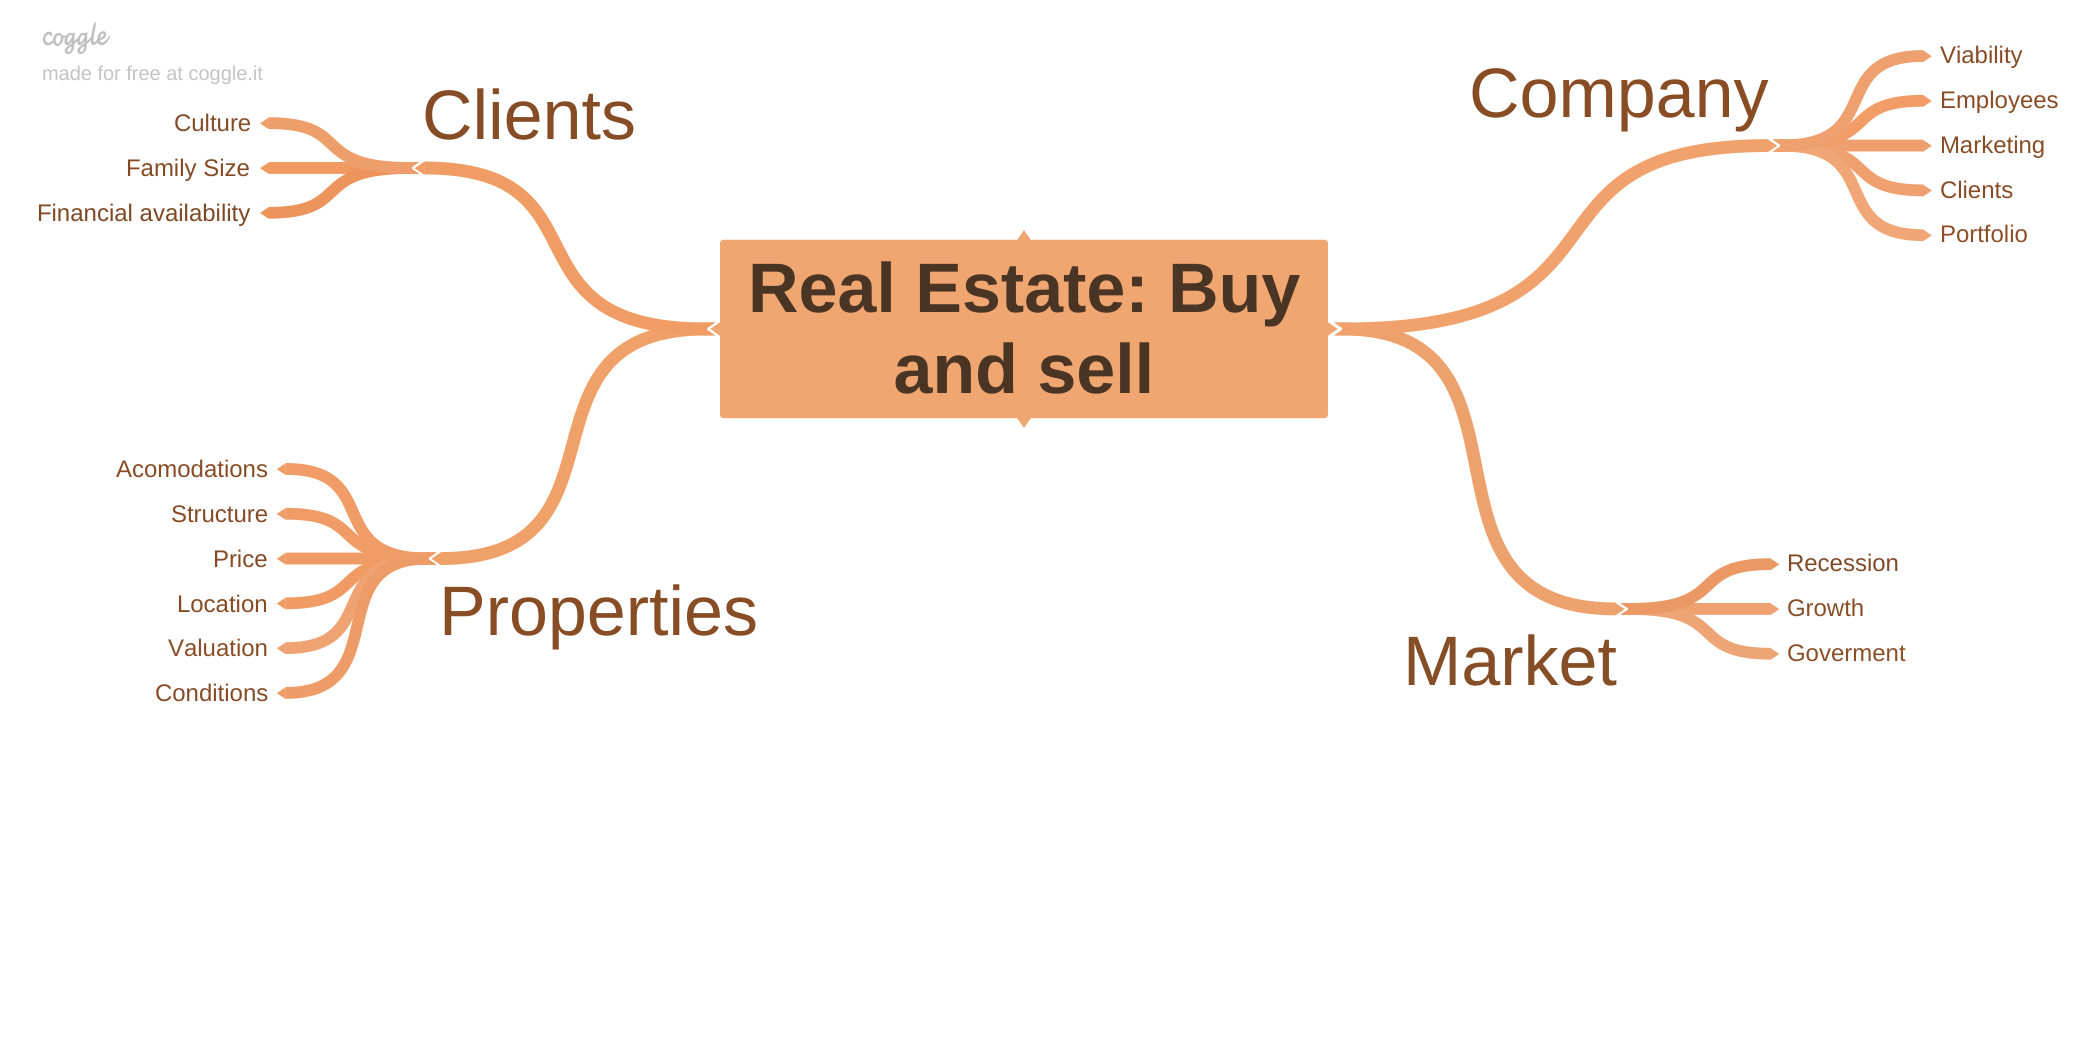

In [88]:
Image('imagens/Real_Estate_Buy_and_sell.png')

### Hypothesis

**1.** Imóveis construídos antes de 1955 são em média 25% mais baratos que os imóveis mais novos.

**2.** Imóveis com 'water view' são em média 25% mais caros que os imóveis que não tem essa característica

**3.** Número de quartos nos imóveis díminuem durante a evolução dos anos

**4.** Os valores dos imóveis diminuem de acordo com o raio central do Lake Washington

**5.** Imóveis com porão são 60% mais caros

**6.** Imóveis com porão há um maior número de quartos

**7.** O crescimento do preço dos imóveis (YoY) é de 13%

### Feature Engineering

In [89]:
# Search geolocation

#geolocator = Nominatim(user_agent = 'geoapiExercises')

#for i in range(len(data)):
#    query = str(data.loc[i, 'lat']) + ',' + str(data.loc[i, 'long'])
#    
#    response = geolocator.reverse(query)
#    
#    if 'road' in response.raw['address']:
#        data.loc[i, 'road']          = response.raw['address']['road']
#        
#    if 'house_number' in response.raw['address']:
#        data.loc[i, 'house_number']  = response.raw['address']['house_number']
#    
#    if 'neighbourhood' in response.raw['address']:
#        data.loc[i, 'neighbourhood'] = response.raw['address']['neighbourhood']
#    
#    if 'city' in response.raw['address']:
#        data.loc[i, 'city']          = response.raw['address']['city']
#    
#    if 'county' in response.raw['address']:
#        data.loc[i, 'county']        = response.raw['address']['county']
#    
#    if 'state' in response.raw['address']:
#        data.loc[i, 'state']         = response.raw['address']['state']
#        
#    if 'country' in response.raw['address']:
#        data.loc[i, 'country']       = response.raw['address']['country']
#    
#    if 'country_code' in response.raw['address']:
#        data.loc[i, 'country_code']  = response.raw['address']['country_code']
#        
#    else: 'Na'


# Merge DataFrames
geoloc['id'] = geoloc['id'].astype(str)
df2 = pd.merge(df2, geoloc, how = 'left', on= 'id')


# Creating Seasons column.
df2['Month'] =  df2['date'].dt.month

for i in range(len(df2)):
            
    if (df2.loc[i, 'Month'] >= 6) & (df2.loc[i, 'Month'] < 9):
        df2.loc[i, 'season'] = 'Summer'

    elif (df2.loc[i, 'Month'] >= 9) & (df2.loc[i, 'Month'] < 12):
        df2.loc[i, 'season'] = 'Autumn'

    elif (df2.loc[i, 'Month'] >= 3) & (df2.loc[i, 'Month'] < 6):
        df2.loc[i, 'season'] = 'Spring'
    
    else:
        df2.loc[i, 'season'] = 'Winter'        


In [90]:
df2.sample(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,query,road,house_number,neighbourhood,city,county,state,Month,season
6919,4055700167,2014-08-14,760000.00,4,3.00,2840,13554,1.00,0,2,4,9,1990,850,1974,0,98034,47.72,-122.26,2840,16940,"47.7153,-122.257",Holmes Point Drive Northeast,12948,NaN,NaN,King County,Washington,8,Summer
20100,1150700130,2015-04-21,275000.00,3,2.50,1710,7230,2.00,0,0,3,7,1710,0,1996,0,98003,47.28,-122.30,1720,6537,"47.2778,-122.298",South 362nd Place,2659,NaN,NaN,King County,Washington,4,Spring


## Data Preparation

In [91]:
df3 = df2.copy()

In [92]:
df3.sample(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,query,road,house_number,neighbourhood,city,county,state,Month,season
3431,6065300570,2014-06-24,1250000.00,4,2.50,3220,15600,1.00,0,0,5,9,1680,1540,1973,0,98006,47.57,-122.18,2990,15600,"47.5697,-122.182",Cascade Key,37,Newport Shores,Bellevue,King County,Washington,6,Summer
7751,3767300041,2014-08-26,920000.00,4,2.75,3140,7258,2.00,0,1,3,10,3140,0,2006,0,98034,47.71,-122.23,2990,13600,"47.7064,-122.232",82nd Avenue Northeast,11738,NaN,NaN,King County,Washington,8,Summer


### Filtering of Rows

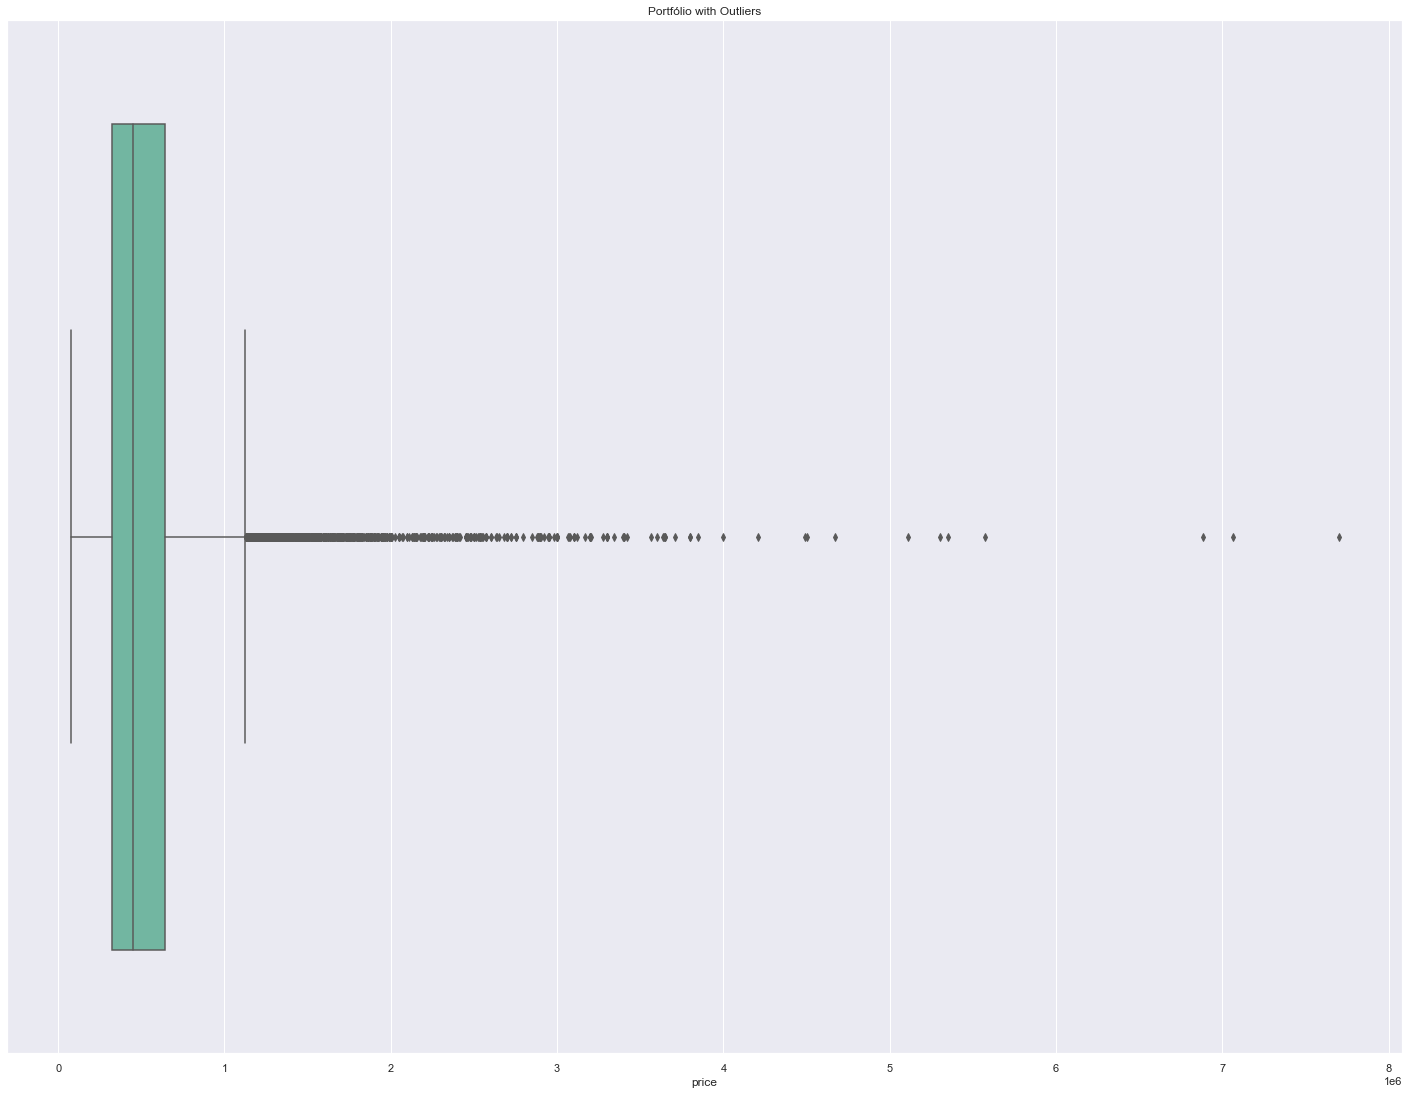

In [93]:
# Seeing Outliers
sns.boxplot(df3['price'],  orient="v", palette="Set2").set_title('Portfólio with Outliers');

# Detection and drop of outliers with IQR

def drop_outliers():
    first_quarter = np.percentile(df3['price'], 25, interpolation = 'midpoint')

    third_quarter = np.percentile(df3['price'], 75, interpolation = 'midpoint')
    result = third_quarter - first_quarter

    # Upper bound
    max_data = np.where(df3['price'] >= (third_quarter+1.5*result))
    # Lower bound
    min_data = np.where(df3['price'] <= (first_quarter-1.5*result))

    ''' Removing the Outliers '''
    df3.drop(max_data[0], inplace = True)
    df3.drop(min_data[0], inplace = True)
    
    return df3

In [94]:
df3 = drop_outliers()

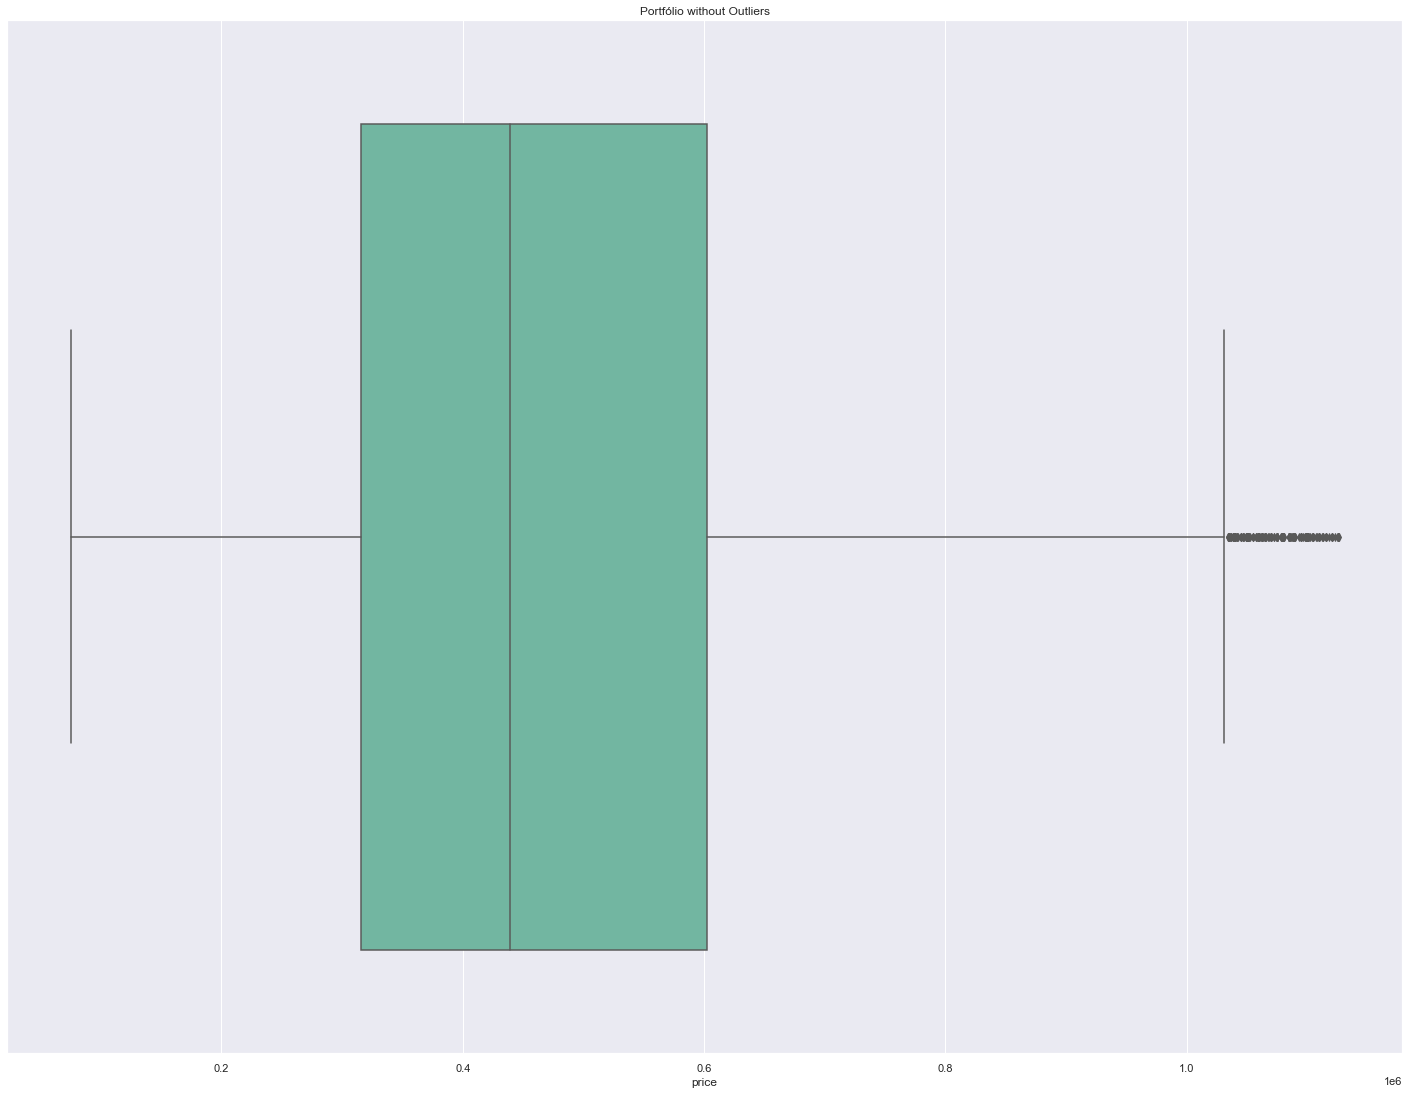

In [95]:
sns.boxplot(df3['price'],  orient="v", palette="Set2").set_title('Portfólio without Outliers');

### Filtering of Columns

In [96]:
cols_drop = ['sqft_living15','sqft_lot15','query', 'Month']
df3 = df3.drop(cols_drop, axis= 1)

In [97]:
df3.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,road,house_number,neighbourhood,city,county,state,season
0,5561000190,2014-05-02,437500.00,3,2.25,1970,35100,2.00,0,0,4,9,1970,0,1977,0,98027,47.46,-121.99,Southeast 154th Street,26069,NaN,NaN,King County,Washington,Spring
1,472000620,2014-05-02,790000.00,3,2.50,2600,4750,1.00,0,0,4,9,1700,900,1951,0,98117,47.68,-122.40,34th Avenue Northwest,7506,Sunset Hill,Seattle,King County,Washington,Spring
2,1024069009,2014-05-02,675000.00,5,2.50,2820,67518,2.00,0,0,3,8,2820,0,1979,0,98029,47.58,-122.03,Southeast 32nd Way,23601,NaN,NaN,King County,Washington,Spring
3,7853361370,2014-05-02,555000.00,4,2.50,3310,6500,2.00,0,0,3,8,3310,0,2012,0,98065,47.52,-121.87,Southeast Terrace Street,35246,NaN,NaN,King County,Washington,Spring
4,5056500260,2014-05-02,440000.00,4,2.25,2160,8119,1.00,0,0,3,8,1080,1080,1966,0,98006,47.54,-122.18,Southeast 65th Street,12201,NaN,Bellevue,King County,Washington,Spring


## Exploratory Data Analysis

In [98]:
df4 = df3.copy()

In [99]:
df4.sample(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,road,house_number,neighbourhood,city,county,state,season
794,103400160,2014-05-15,263000.00,3,2.25,1590,7748,2.00,0,0,4,7,1590,0,1991,0,98003,47.29,-122.30,26th Court South,35219,Emery Woods,NaN,King County,Washington,Spring
16849,627300195,2015-03-03,750000.00,5,2.50,3240,9960,1.00,0,1,3,8,2020,1220,1958,0,98008,47.59,-122.11,Southeast 26th Street,17161,Sammamish Heights,Bellevue,King County,Washington,Spring


### Univariate Analysis

**Response Variable**

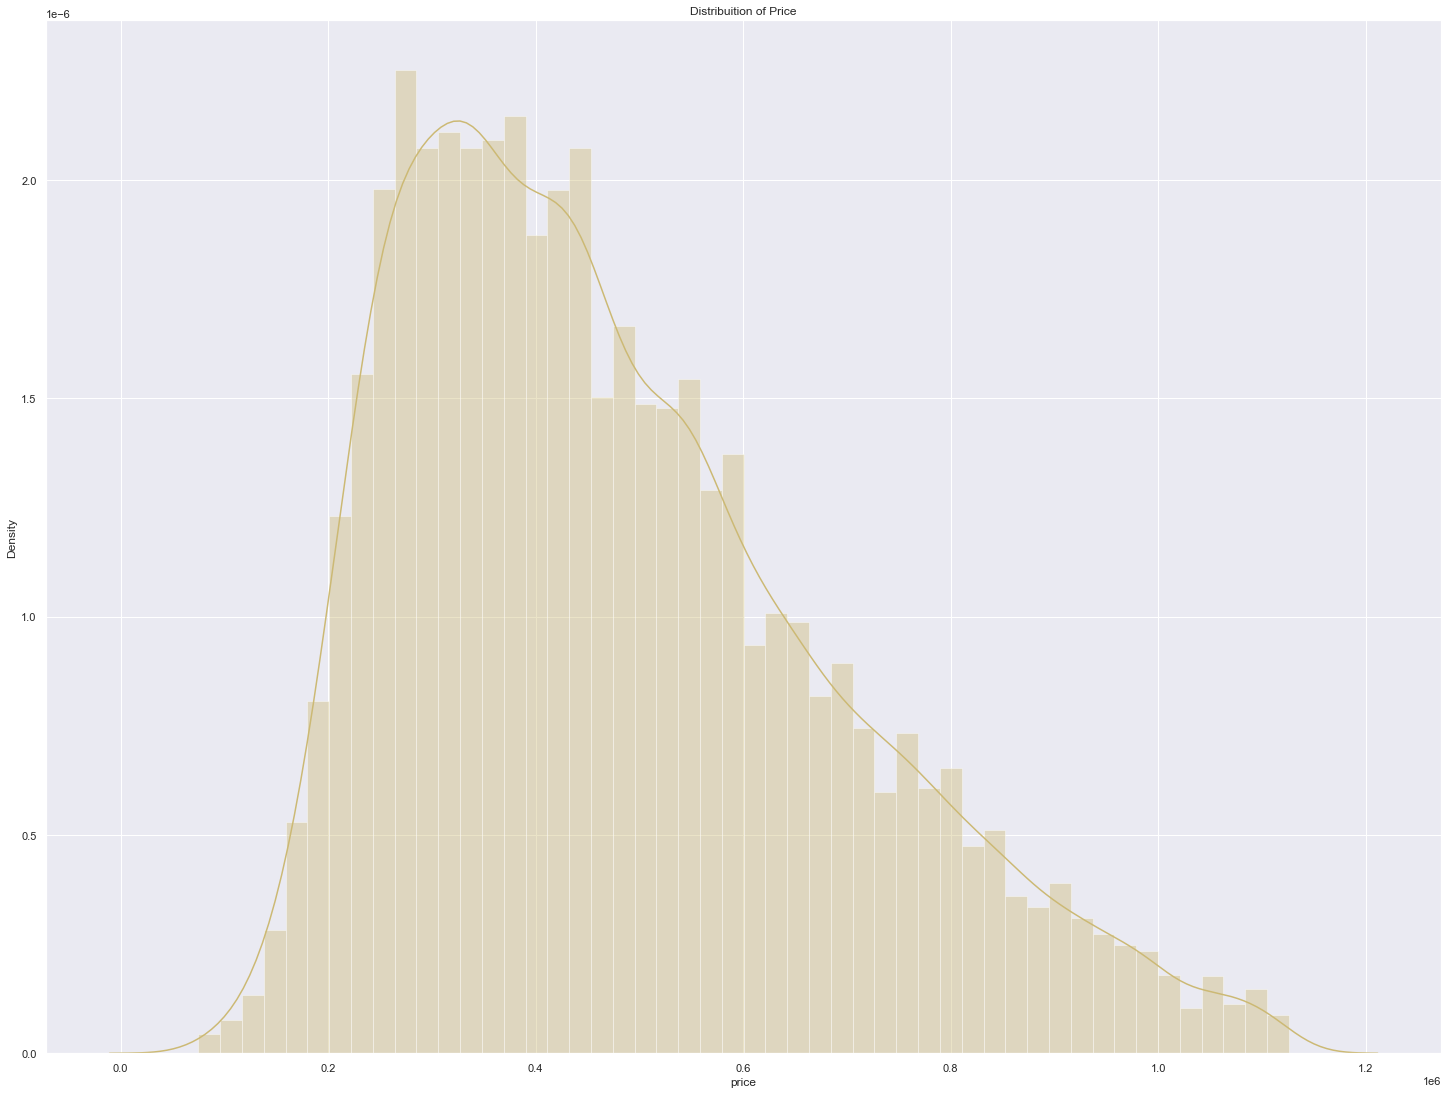

In [100]:
sns.distplot(df4['price'], color='y').set_title('Distribuition of Price');

#### Categorical Variable

**Cities in Porfólio**

In [101]:
cities = df4[['city', 'zipcode']].groupby('city').size()
cities = pd.DataFrame(cities).reset_index()

cities.columns = ['Cities', 'Concentration']
cities.sort_values('Concentration')

,Cities,Concentration
2,King County,2
1,Kent,5
4,Shoreline,621
0,Bellevue,1100
3,Seattle,6672


In [102]:
def cities_concetration():
    m = folium.Map(location=[47.61,-122.20], tiles="Stamen Toner", zoom_start=12)

    folium.Circle(
        radius=1500,
        location=[47.61,-122.20],
        popup="The Waterfront",
        color="crimson",
        fill=False,
    ).add_to(m)

    folium.Circle(
        radius=1500,
        location=[47.60,-122.33],
        popup="The Waterfront",
        color="crimson",
        fill=False,
    ).add_to(m)


    m
    
    return m

**Concetration of the Cities in Portoflio**

In [103]:
cities_concetration()

### Bivariate Analysis

**Nesta seção, será utilizada uma análise bivariada para validação das hipoteses.**

#### **1.** Imóveis construídos antes de 1955 são em média 25% mais baratos que os imóveis mais novos.

In [104]:
def under_over(data):
    
    over = data[data['yr_built'] > 1955]['price'].mean()
    under = data[data['yr_built'] <= 1955]['price'].mean()
    print('A média de preço dos imóveis até 1955 é de {}'.format(round(under,2)))
    print('A média de preço dos imóveis após 1955 é de {}'.format(round(over,2)))
    Under_Over = {'Mean Over 1955': over, 'Mean Under 1955': under}
    Under_Over = pd.DataFrame.from_dict(Under_Over, orient='index')
    Under_Over = Under_Over.T
    Under_Over['Dif $'] = Under_Over['Mean Over 1955'] - Under_Over['Mean Under 1955']
    Under_Over['Dif %'] = (Under_Over['Mean Over 1955'] - Under_Over['Mean Under 1955'])  / Under_Over['Mean Under 1955'] * 100
    
    return Under_Over

In [105]:
under_over(df4)

A média de preço dos imóveis até 1955 é de 473334.25
A média de preço dos imóveis após 1955 é de 480051.07


,Mean Over 1955,Mean Under 1955,Dif $,Dif %
0,480051.07,473334.25,6716.82,1.42


#### **2.** Imóveis com 'water view' são em média 25% mais caros que os imóveis que não tem essa característica

In [106]:
def wanter_view(data):
    
    with_water = data[data['waterfront'] == 1]['price'].mean()
    without_water = data[data['waterfront'] == 0]['price'].mean()
    print('A média de preço dos imóveis com Water Fronte é de {}'.format(round(with_water,2)))
    print('A média de preço dos imóveis sem Water Fronte de {}'.format(round(without_water,2)))
    aux = {'Mean with WaterFronte': with_water, 'Mean without WaterFronte': without_water}
    aux = pd.DataFrame.from_dict(aux, orient='index')
    aux = aux.T
    aux['Dif $'] = abs(aux['Mean without WaterFronte'] - aux['Mean with WaterFronte'])
    aux['Dif %'] = abs(((aux['Mean with WaterFronte'] - aux['Mean without WaterFronte'])  / aux['Mean without WaterFronte']) * 100)
    
    return aux

In [107]:
wanter_view(df4)

A média de preço dos imóveis com Water Fronte é de 673056.43
A média de preço dos imóveis sem Water Fronte de 477464.88


,Mean with WaterFronte,Mean without WaterFronte,Dif $,Dif %
0,673056.43,477464.88,195591.55,40.96


#### **3.** Número de quartos nos imóveis díminuem durante a evolução dos anos

In [108]:
aux = df4[['yr_built', 'bedrooms']].groupby('yr_built').max().reset_index()

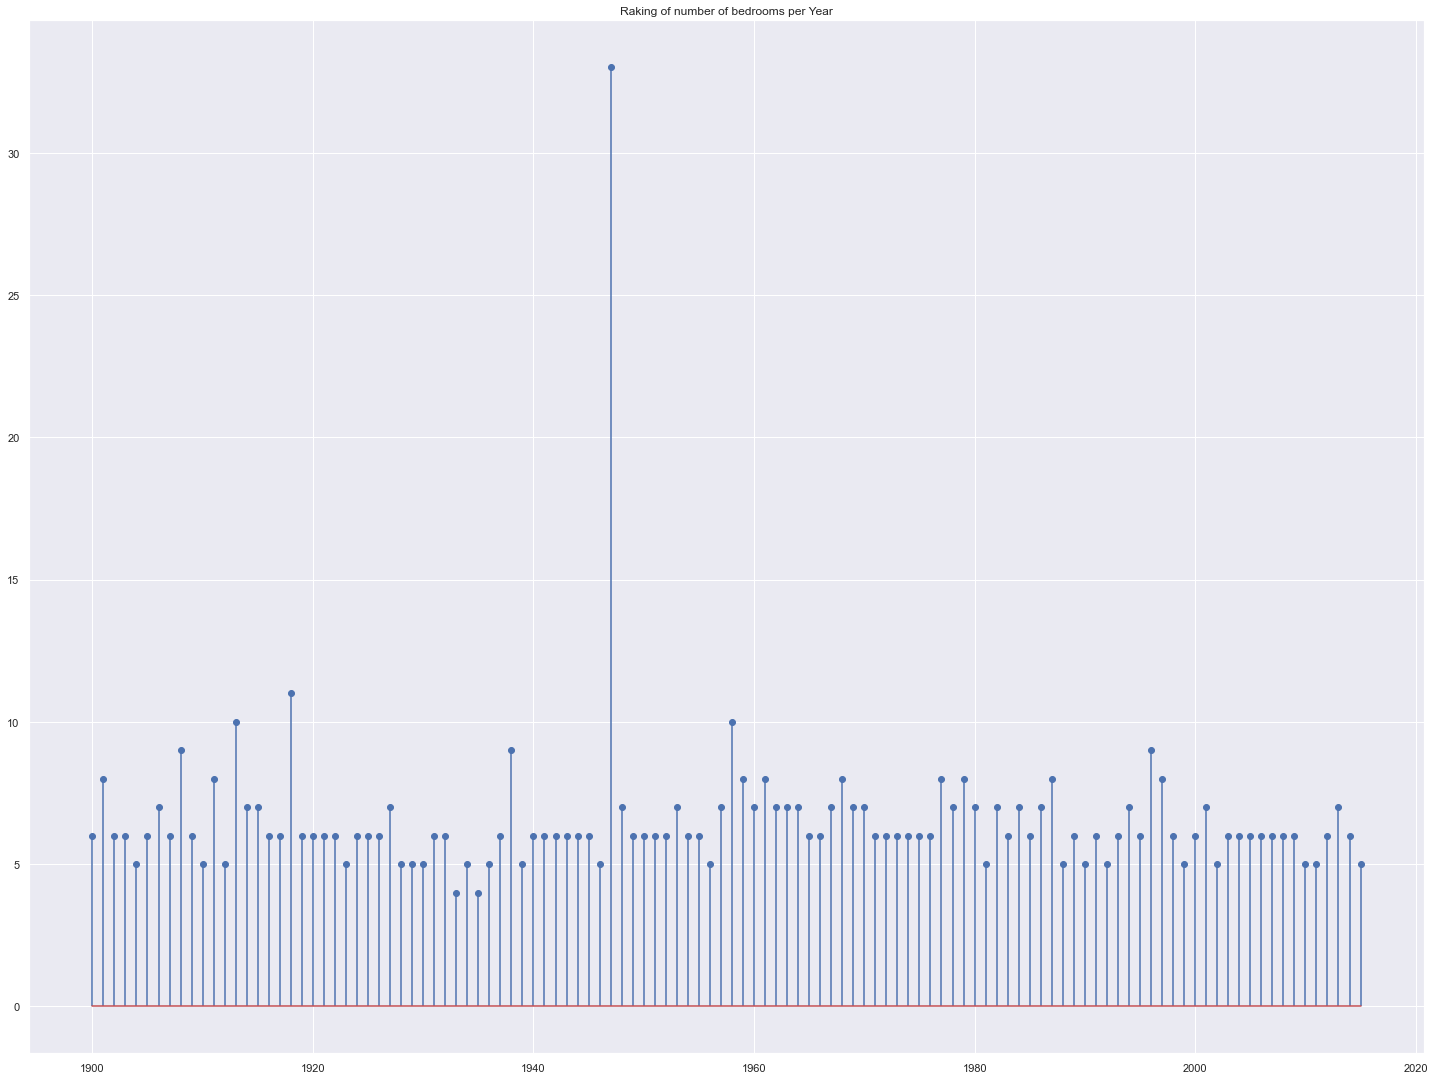

In [109]:
plt.title('Raking of number of bedrooms per Year')
plt.stem(aux['yr_built'],aux['bedrooms']);
plt.show()

#### **4.**  Imóveis com porão são 60% mais caros

In [110]:
def basament(data):

    basement = data[data['sqft_basement'] > 0]['price'].mean()
    no_basement = data[data['sqft_basement'] == 0]['price'].mean()
    bas_no_bas = {'Mean with Basement': basement, 'Mean without Basement': no_basement}
    bas_no_bas = pd.DataFrame.from_dict(bas_no_bas, orient='index')
    bas_no_bas = bas_no_bas.T
    bas_no_bas['Dif $'] = abs(bas_no_bas['Mean without Basement'] - bas_no_bas['Mean with Basement'])
    bas_no_bas['Dif %'] = abs((bas_no_bas['Mean with Basement'] - bas_no_bas['Mean without Basement'])  / bas_no_bas['Mean without Basement'] * 100)   
    
    return bas_no_bas

In [111]:
basament(df4)

,Mean with Basement,Mean without Basement,Dif $,Dif %
0,522154.40,451083.90,71070.50,15.76


#### **5.**  O crescimento do preço dos imóveis (YoY) é de 10%

In [112]:
def teste(data):
    YoY = data[['date', 'price']]
    YoY['Dif'] = YoY['price'].diff(1).fillna(0)
    YoY['Year'] = YoY['date'].dt.year
    YoY = YoY.groupby('Year')['price'].mean().reset_index()
    YoY['Dif'] = YoY['price'].diff(1).fillna(0)
    YoY['Dif %'] = YoY['Dif'] /YoY['price']*100
    fig, ax = plt.subplots()
    plt.plot(YoY['Year'], YoY['Dif %'])
    plt.title('Real estate growth by year of availability')
    plt.show();

    return None

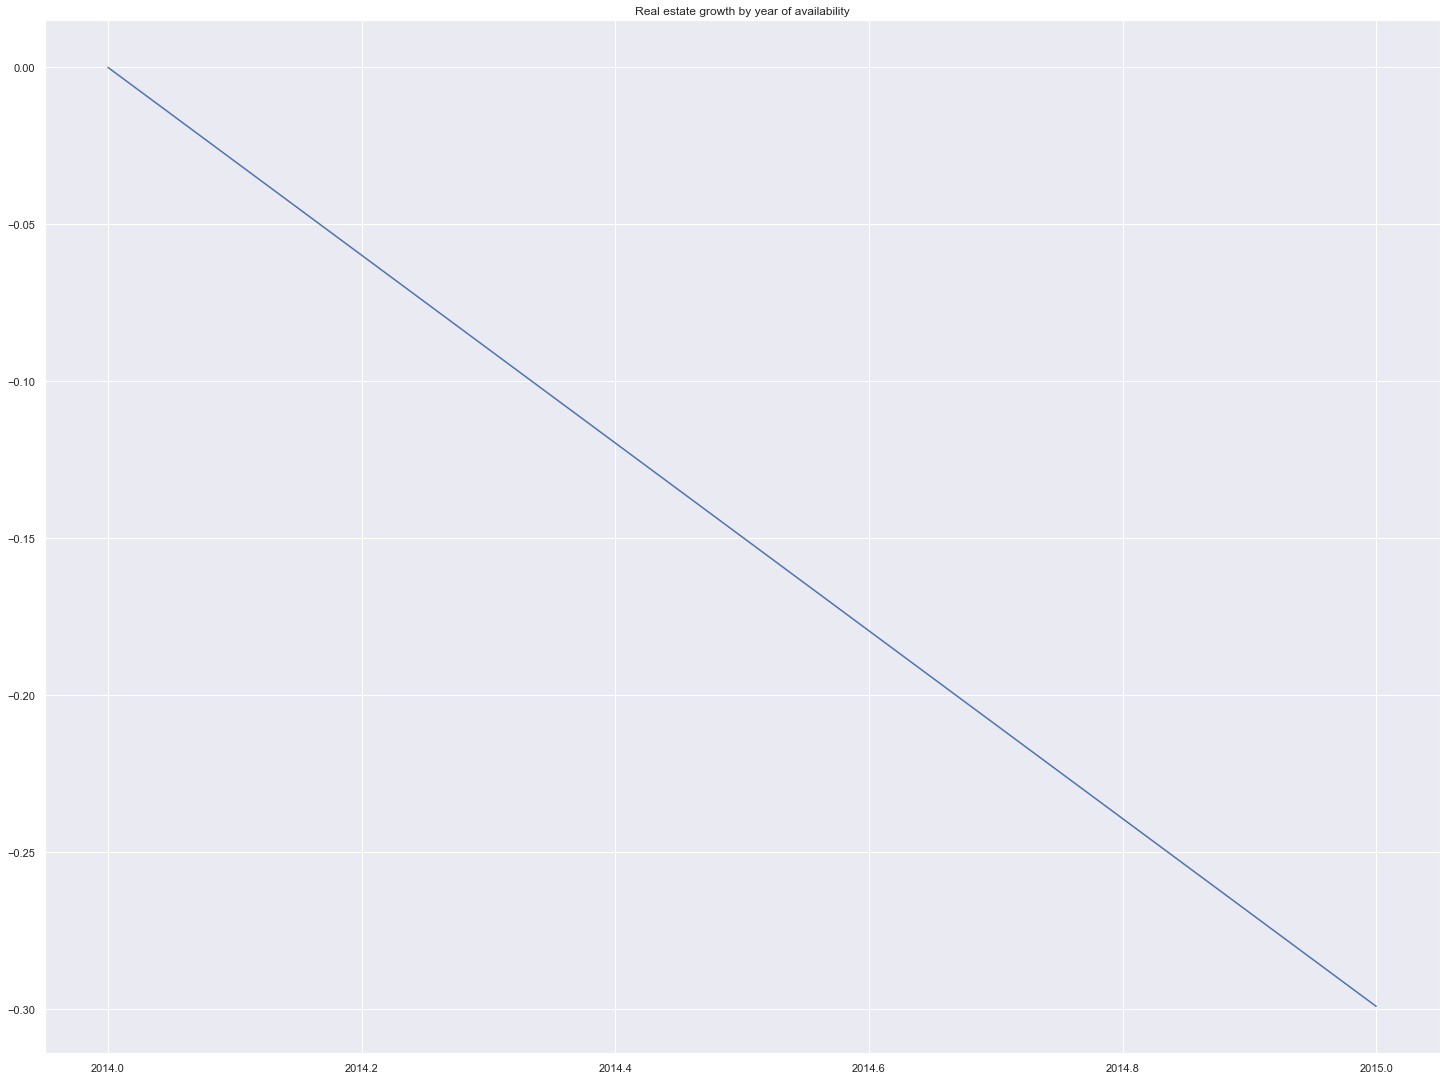

In [113]:
teste(df4)

### Multivariate analysis

In [114]:
def corr_numerical(data):
    corr = data.select_dtypes(exclude = 'object')
    corr = corr.corr(method='pearson')
    sns.heatmap(corr, 
            square=True,
            annot=True);
    return None

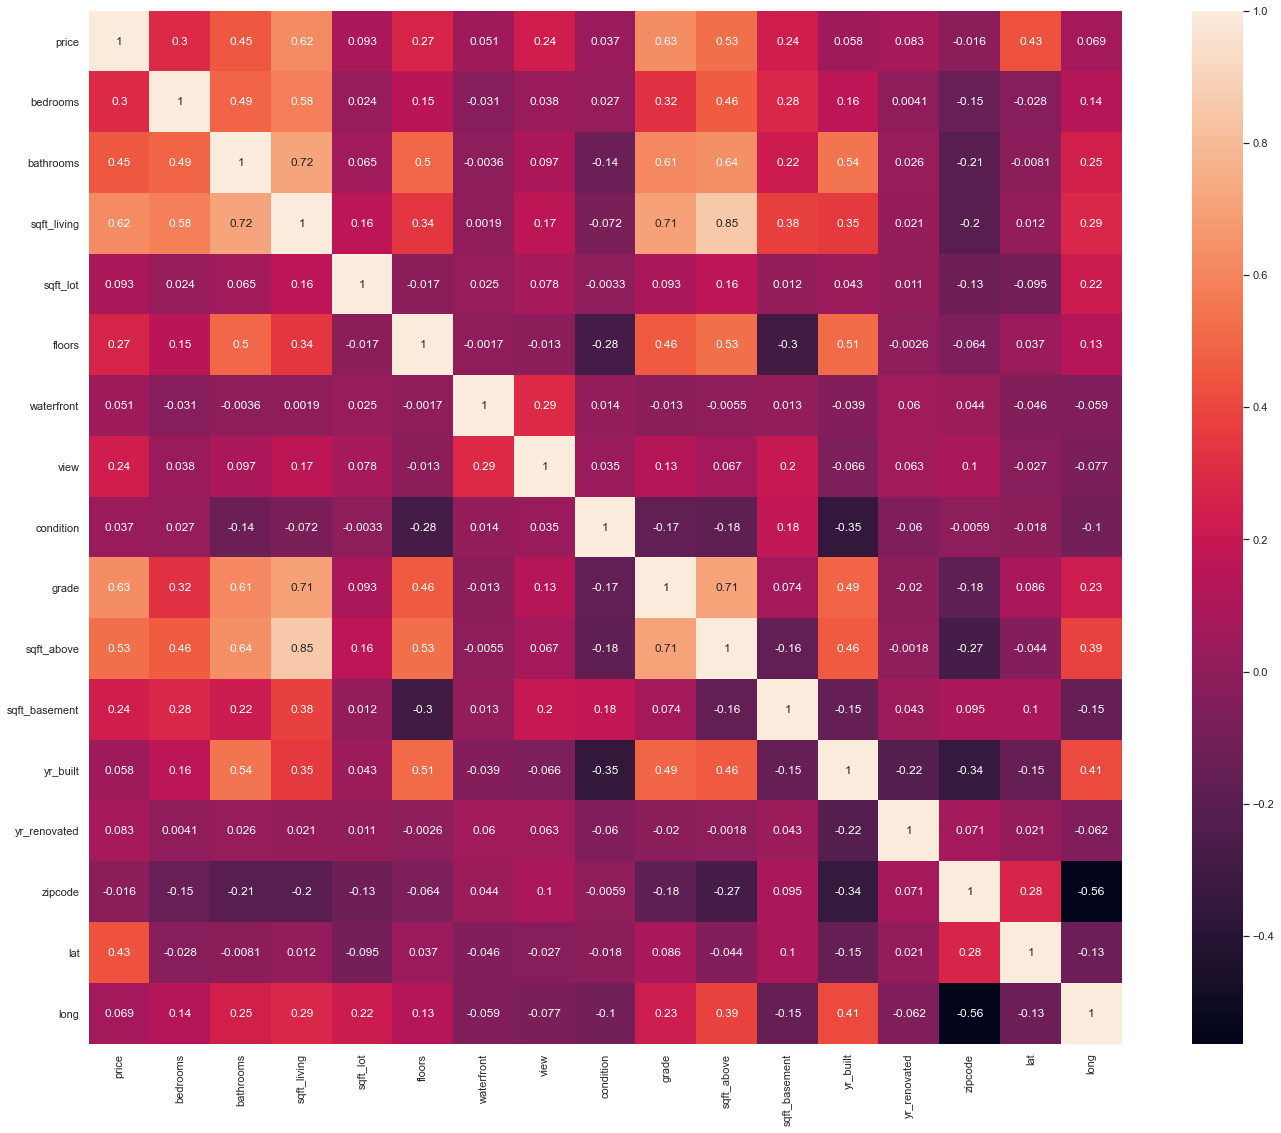

In [115]:
corr_numerical(df4)

## Houses Decisions

In [116]:
df5 = df4.copy()

### Quais são os imóveis que a House Rocket deveria comprar e por qual preço?

In [117]:
# Mean Price per zipcode
mean_zipcode = df4[['price', 'zipcode']].groupby('zipcode').mean().reset_index()
# Rename columns
mean_zipcode.rename(columns = {'price':'Mean Price Zip Code'}, inplace = True)
# Merge Df
decision_df = pd.merge(df4[['id', 'price', 'condition', 'zipcode']], mean_zipcode, how='left', on='zipcode')
# Create status
for i in range(len(decision_df)):
    if (decision_df.loc[i, 'price'] < decision_df.loc[i, 'Mean Price Zip Code']) & (decision_df.loc[i, 'condition'] >= 3):
        decision_df.loc[i, 'Status'] = 'Comprar'
    
    else:
        decision_df.loc[i, 'Status'] = 'Não Comprar'
        
houses_to_buy = decision_df[decision_df['Status'] == 'Comprar']
houses_to_buy['Percentage Under Zipcode'] = houses_to_buy['price'] - houses_to_buy['Mean Price Zip Code'] / houses_to_buy['Mean Price Zip Code'] * 100
houses_to_buy['Percentage Under Zipcode'] = abs((houses_to_buy['price'] - houses_to_buy['Mean Price Zip Code']) / houses_to_buy['Mean Price Zip Code'] * 100)
houses_to_buy = houses_to_buy.sort_values(by = 'Percentage Under Zipcode', ascending=False)


print('Há {} imóveis recomendados para compra'.format(houses_to_buy.shape[0]))
Houses_To_Buy = pd.merge(houses_to_buy, df5[['id', 'bedrooms','bathrooms', 'waterfront', 'road', 'house_number','neighbourhood','city','county', 'lat', 'long']], left_on = 'id', right_on = 'id', how = 'left')
Houses_To_Buy.rename(columns = {'id':'ID',
                               'price': 'Purchase Price',
                               'condition':'Condition',
                               'zipcode': 'ZipCode',
                               'Mean Price Zip Code': 'Mean Price Zipcode',
                               'bedrooms': 'Bedrooms',
                               'bathrooms': 'Bathrooms',
                               'waterfront':'Waterfronte',
                               'road': 'Road',
                               'house_number':'House Number',
                               'neighbourhood': 'Neighbourhood',
                               'city':'City',
                               'county': 'County'}, inplace= True)
Houses_To_Buy.head()

Há 11514 imóveis recomendados para compra


,ID,Purchase Price,Condition,ZipCode,Mean Price Zipcode,Status,Percentage Under Zipcode,Bedrooms,Bathrooms,Waterfronte,Road,House Number,Neighbourhood,City,County,lat,long
0,1049010620,90000.00,3,98034,475386.33,Comprar,81.07,2,1.00,0,122nd Place Northeast,14710,NaN,NaN,King County,47.74,-122.18
1,1238500451,130000.00,4,98033,659093.84,Comprar,80.28,3,1.00,0,124th Avenue Northeast,9014,NaN,NaN,King County,47.68,-122.18
2,2870000040,145000.00,3,98033,659093.84,Comprar,78.00,2,1.00,0,Northeast 91st Street,12508,NaN,NaN,King County,47.68,-122.17
3,2354300456,130000.00,4,98027,571632.57,Comprar,77.26,2,1.00,0,2nd Avenue Southeast,198,NaN,NaN,King County,47.53,-122.03
4,5016003230,169317.00,3,98112,736316.43,Comprar,77.00,2,1.00,0,24th Avenue East,608,NaN,Seattle,King County,47.62,-122.30


**Result**

De acordo com a análise realizada foram identificados 11.514 imóveis no portfólio que estão propensos para compras. Ao todo, seriam investidos $ 4.381.264.877,00 para aquisição dos imóveis. Em uma comparação com a média de preço da área para cada imóvel, foi identificado que há imóveis com uma diferença percentual de mais de 80% a menor que a área.

Os imóveis estão localizados de acordo com o mapa abaixo, destacado por seu valor, sendo: Qual mais caro o imóvel, maior a área de destaque.

In [118]:
fig = px.scatter_mapbox(Houses_To_Buy,
                           lat = 'lat',
                           lon = 'long',
                           color = 'Condition',
                           size = 'Purchase Price',
                           color_continuous_scale = px.colors.cyclical.IceFire, 
                           size_max = 15,
                           zoom = 10)

fig.update_layout(mapbox_style = 'open-street-map')
fig.update_layout(height = 600, margin = {'r': 0, 't': 0, 'l': 0, 'b':0})
fig.show()

### Qual melhor momento para vender os imóveis comprados e por qual preço?

In [119]:
# Calculating the median of price per season
mean_per_season = df5[['price', 'zipcode', 'season']].groupby(['zipcode', 'season']).median().reset_index()
mean_per_season = mean_per_season.pivot(index = 'zipcode', columns='season', values='price').reset_index()

# Merge meadin per seadon with purchased houses
Houses_To_Buy = Houses_To_Buy[['ID', 'Purchase Price', 'ZipCode', 'Mean Price Zipcode']]
Houses_To_Sell = pd.merge(Houses_To_Buy, mean_per_season, how = 'left', left_on='ZipCode', right_on='zipcode')

# Capture the high price in seasons
def max_value(row):
    return max(row['Autumn'], row['Spring'], row['Summer'], row['Winter'])

# Apply to see the high season
Houses_To_Sell['Max_Price_Season'] = Houses_To_Sell.apply(max_value, axis=1)

# Write the season name
for i in range(len(Houses_To_Sell)):

    if Houses_To_Sell.loc[i,'Max_Price_Season'] == Houses_To_Sell.loc[i,'Autumn']:
        Houses_To_Sell.loc[i,'Season to Sell'] = 'Autumn'

    elif Houses_To_Sell.loc[i,'Max_Price_Season'] == Houses_To_Sell.loc[i,'Spring']:
        Houses_To_Sell.loc[i,'Season to Sell'] = 'Spring'

    elif Houses_To_Sell.loc[i,'Max_Price_Season'] == Houses_To_Sell.loc[i,'Summer']:
        Houses_To_Sell.loc[i,'Season to Sell'] = 'Summer'

    elif Houses_To_Sell.loc[i,'Max_Price_Season'] == Houses_To_Sell.loc[i,'Winter']:
        Houses_To_Sell.loc[i,'Season to Sell'] = 'Winter'    

    else:
        Houses_To_Sell.loc[i,'Season to Sell'] = 'NA'   

# Apply 30% percent in price if the price of season are under and 10% percent if over.
Houses_To_Sell['Suggested Selling'] = Houses_To_Sell.apply(lambda x: (x['Purchase Price'] * 0.30) + x['Purchase Price'] if x['Purchase Price'] < x['Max_Price_Season'] else x['Purchase Price'] * 0.04 + x['Purchase Price'], axis = 1)

Houses_To_Sell.rename(columns = {'Purchase Price':'PURCHASE PRICE',
                                'ZipCode': 'ZIPCODE',
                                'Mean Price Zipcode': 'MEAN PRICE ZIPCODE',
                                'Autumn': 'MEDIAN PRICE AUTUMN',
                                'Spring': 'MEDIAN PRICE SPRING',
                                'Summer': 'MEDIAN PRICE SUMMER',
                                'Winter': 'MEDIAN PRICE WINTER',
                                'Season to Sell': 'SEASON TO SELL',
                                'Suggested Selling': 'SUGGESTED SELLING'}, inplace = True)

# Select columns.
Houses_To_Sell = Houses_To_Sell[['ID','PURCHASE PRICE', 'ZIPCODE', 'MEAN PRICE ZIPCODE','MEDIAN PRICE AUTUMN', 'MEDIAN PRICE SPRING', 'MEDIAN PRICE SUMMER','MEDIAN PRICE WINTER', 'SEASON TO SELL','SUGGESTED SELLING']]

In [120]:
print('Valor total de venda seguindo sugestão {}'.format(Houses_To_Sell['SUGGESTED SELLING'].sum()))

Valor total de venda seguindo sugestão 5639229496.940001


In [121]:
Houses_To_Sell.head()

,ID,PURCHASE PRICE,ZIPCODE,MEAN PRICE ZIPCODE,MEDIAN PRICE AUTUMN,MEDIAN PRICE SPRING,MEDIAN PRICE SUMMER,MEDIAN PRICE WINTER,SEASON TO SELL,SUGGESTED SELLING
0,1049010620,90000.00,98034,475386.33,446700.00,455000.00,441750.00,431750.00,Spring,117000.00
1,1238500451,130000.00,98033,659093.84,569000.00,652500.00,663000.00,637500.00,Summer,169000.00
2,2870000040,145000.00,98033,659093.84,569000.00,652500.00,663000.00,637500.00,Summer,188500.00
3,2354300456,130000.00,98027,571632.57,575000.00,562500.00,555000.00,521500.00,Autumn,169000.00
4,5016003230,169317.00,98112,736316.43,714250.00,751750.00,735000.00,692499.50,Spring,220112.10


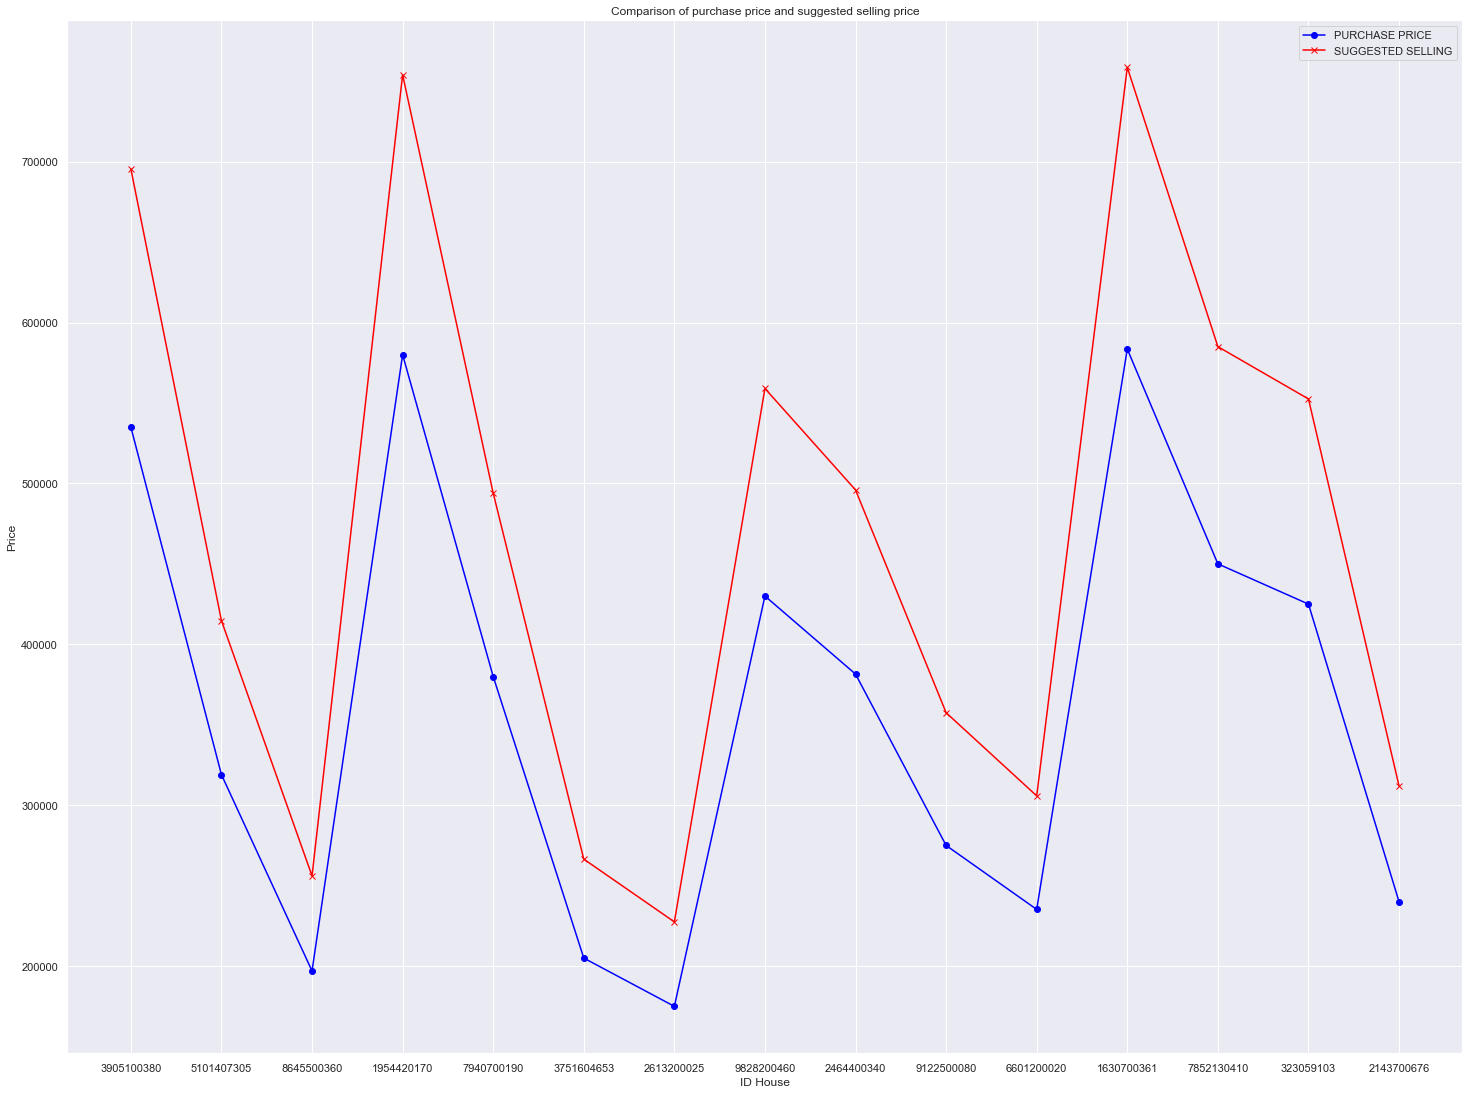

In [125]:
# Make Visual
graph = Houses_To_Sell.sort_values(by='PURCHASE PRICE', ascending= False).sample(15)
plt.plot(graph['ID'], graph['PURCHASE PRICE'], color='blue', marker='o', label='PURCHASE PRICE')
plt.plot(graph['ID'], graph['SUGGESTED SELLING'], color='red', marker='x', label='SUGGESTED SELLING')
plt.title('Comparison of purchase price and suggested selling price')
plt.xlabel('ID House')
plt.ylabel('Price')
plt.legend()
plt.show()

## Resultados financeiros

Após análise do portfólio da House Rocket, partindo do planejamento descrito no início deste documento, foi possível mapear os imóveis mais propensos para compra e posterior venda. No resultado proposto, a House Rocket deverá desembolsar um total de $ 4.381.264.877,00 na aquisição de 11.690 imóveis, de um total de 21.436, disponíveis no portfólio.

Na venda dos imóveis foi possível indicar para a empresa qual o melhor período para venda. A resultado proposto se deu por meio da análise do comportamento dos preços pela área e pelas estações do ano, indicando qual o melhor período para venda.

Seguindo a recomendação da análise, a empresa poderá ter uma receita nas vendas de $$5.639.229.496,94. As vendas podem trazer um lucro de $ 1.257.964.619,94 (28,71%) dos desembolsados na compra dos imóveis.


## Conclusão

Após análise dos resultados, percebe-se um ganho substância no uso potencial dos dados por meio de sua exploração. Devido o resultado, resume-se que o objetivo inicial deste projeto foi alcançado, dando oportunidade para os próximos passos para sua evolução.

## Próximos passos

Como próximos passos, pretende-se:

    1. Aprimorar a forma de calculo percentual para incrementar o valor de venda;
    2. Montar o modelo em produção, para que os interessados façam visualizações mais personalizadas em suas análises.